> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 9: Parsing and Information Extraction

*Morning, August 17, 2018*

In this Exercise Set we shall develop our webscraping skills even further by practicing navigating html trees using BeautifoulSoup and furthermore train extracting information from raw text with no html tags to help, using regular expressions. 

## Exercise Section 9.1: Parsing a Table from HTML using BeautifulSoup.

Yesterday I showed you a neat little prepackaged function in pandas that did all the work. However today we should learn the mechanics of it. *(It is not just for educational purposes, sometimes the package will not do exactly as you want.)*

We hit the Basketball stats page from yesterday again: https://www.basketball-reference.com/leagues/NBA_2018.html.


> **Ex. 9.1.1:** Here we practice simply locating the table node of interest using the `find` method build into BeautifoulSoup. But first we have to fetch the HTML using the `requests` module. Parse the tree using `BeautifulSoup`. And then use the **>Inspector<** tool (* right click on the table < press inspect element *) in your browser to see how to locate the Eastern Conference table node - i.e. the *tag* name of the node, and maybe some defining *attributes*.

In [5]:
import requests
from bs4 import BeautifulSoup
import bs4
import pandas as pd

url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url)
soup = BeautifulSoup(response.text,'lxml')
result_list = soup.find('table',{'id':'confs_standings_E'})


You have located the table should now build a function that starts at a "table node" and parses the information, and outputs a pandas DataFrame. 

Inspect the element either within the notebook or through the **>Inspector<** tool and start to see how a table is written in html. Which tag names can be used to locate rows? How will you iterate through columns. Were is the header located?

> **Ex. 9.1.2:** First you parse the header which can be found in the canonical tag name: thead. 
Next you use the `find_all` method to search for the tag, and iterate through each of the elements extracting the text, using the `.text` method builtin to the the node object. Store the header values in a list container. 

In [6]:
header = result_list.find_all('th')
cols = []
for col in header:
    field = col.get('aria-label')
    if field != None:
        cols.append(field)
print(cols)

['Eastern Conference', 'Wins', 'Losses', 'Win-Loss Percentage', 'Games Behind', 'Points Per Game', 'Opponent Points Per Game', 'Simple Rating System']


> **Ex. 9.1.3:** Next you locate the rows, using the canonical tag name: tbody. And from here you search for all rows tags. Fiugre out the tag name yourself, inspecting the tbody node in python or using the **Inspector**. 

In [7]:
body = result_list.find('tbody')
rows = body.find_all('tr')

> **Ex. 9.1.4:** Next run through all the rows and extract each value, similar to how you extracted the header. However here is a slight variation: Since each value node can have a different tag depending on whether it is a digit or a string, you should use the `.children` method instead of the `.find_all` - (or write compile a regex that matches both the td tag and the th tag.) 
>Once the value nodes of each row has been located using the `.children` method you should extract the value. Store the extracted rows as a list of lists: ```[[val1,val2,...valk],...]```

In [8]:
import numpy as np

def convert_value(rows):
    if rows.name == 'th':
        return rows.text
    else:
        try:
            return float(rows.text)
        except:
            return np.nan

data = []
for row in rows:
    row_list = []
    for cell in row.children:
        row_list.append(convert_value(cell))
    data.append(row_list)

> **Ex. 9.1.5:** Convert the data you have collected into a pandas dataframe. _Bonus:_ convert the code you've written above into a function which scrapes the page for you and returns a dataframe. 

In [9]:
df = pd.DataFrame(data)
df.columns = cols 

def scrabe_nba(tables):
    url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'lxml')
    result_list = soup.find('table',{'id':tables})
    header = result_list.find_all('th')
    cols = []
    for col in header:
        field = col.get('aria-label')
        if field != None:
            cols.append(col.get('aria-label'))
    print(cols)
    body = result_list.find('tbody')
    rows = body.find_all('tr')
    def convert_value(rows):
        if rows.name == 'th':
            return rows.text
        else:
            try:
                return float(rows.text)
            except:
                return np.nan
    data = []
    for row_cols in rows:
        row_list = []
        for row in row_cols.children:
            row_list.append(convert_value(row))
        data.append(row_list)
    df = pd.DataFrame(data)
    df.columns = cols 
    return df
tables = 'confs_standings_E'
scrabe_nba(tables)

['Eastern Conference', 'Wins', 'Losses', 'Win-Loss Percentage', 'Games Behind', 'Points Per Game', 'Opponent Points Per Game', 'Simple Rating System']


,Eastern Conference,Wins,Losses,Win-Loss Percentage,Games Behind,Points Per Game,Opponent Points Per Game,Simple Rating System
0,Toronto Raptors* (1),59.0,23.0,0.720,NaN,111.7,103.9,7.29
1,Boston Celtics* (2),55.0,27.0,0.671,4.0,104.0,100.4,3.23
2,Philadelphia 76ers* (3),52.0,30.0,0.634,7.0,109.8,105.3,4.30
3,Cleveland Cavaliers* (4),50.0,32.0,0.610,9.0,110.9,109.9,0.59
4,Indiana Pacers* (5),48.0,34.0,0.585,11.0,105.6,104.2,1.18
5,Miami Heat* (6),44.0,38.0,0.537,15.0,103.4,102.9,0.15
6,Milwaukee Bucks* (7),44.0,38.0,0.537,15.0,106.5,106.8,-0.45
7,Washington Wizards* (8),43.0,39.0,0.524,16.0,106.6,106.0,0.53
8,Detroit Pistons (9),39.0,43.0,0.476,20.0,103.8,103.9,-0.26
9,Charlotte Hornets (10),36.0,46.0,0.439,23.0,108.2,108.0,0.07


> **Ex. 9.1.6:** Now locate all tables from the page, using the `.find_all` method searching for the table tag name. Iterate through the table nodes and apply the function created for parsing html tables. Store each table in a dictionary using the table name as key. The name is found by accessing the id attribute of each table node, using dictionary-style syntax - i.e. `table_node['id']`.

In [10]:
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url)
soup = BeautifulSoup(response.text,'lxml')
table_nodes = soup.find_all('table')

def scrabe_nba(table_nodes):
    tables = []
    for table in table_nodes:
        header = table.find_all('th')
        cols = []
        for col in header:
            field = col.get('aria-label')
            if field != None:
                cols.append(col.get('aria-label'))
        print(cols)
        body = table.find('tbody')
        rows = body.find_all('tr')
        def convert_value(rows):
            if rows.name == 'th':
                return rows.text
            else:
                try:
                    return float(rows.text)
                except:
                    return np.nan
        data = []
        for row_cols in rows:
            row_list = []
            for row in row_cols.children:
                row_list.append(convert_value(row))
            data.append(row_list)
        df = pd.DataFrame(data)
        df.columns = cols
        tables.append(df)
    return tables

list = scrabe_nba(table_nodes)


['Eastern Conference', 'Wins', 'Losses', 'Win-Loss Percentage', 'Games Behind', 'Points Per Game', 'Opponent Points Per Game', 'Simple Rating System']
['Western Conference', 'Wins', 'Losses', 'Win-Loss Percentage', 'Games Behind', 'Points Per Game', 'Opponent Points Per Game', 'Simple Rating System']
['Eastern Conference', 'Wins', 'Losses', 'Win-Loss Percentage', 'Games Behind', 'Points Per Game', 'Opponent Points Per Game', 'Simple Rating System']
['Western Conference', 'Wins', 'Losses', 'Win-Loss Percentage', 'Games Behind', 'Points Per Game', 'Opponent Points Per Game', 'Simple Rating System']


In [20]:
list[2]

,Eastern Conference,Wins,Losses,Win-Loss Percentage,Games Behind,Points Per Game,Opponent Points Per Game,Simple Rating System
0,Atlantic Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto Raptors* (1),59.0,23.0,0.720,NaN,111.7,103.9,7.29
2,Boston Celtics* (2),55.0,27.0,0.671,4.0,104.0,100.4,3.23
3,Philadelphia 76ers* (3),52.0,30.0,0.634,7.0,109.8,105.3,4.30
4,New York Knicks (11),29.0,53.0,0.354,30.0,104.5,108.0,-3.53
5,Brooklyn Nets (12),28.0,54.0,0.341,31.0,106.6,110.3,-3.67
6,Central Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cleveland Cavaliers* (4),50.0,32.0,0.610,NaN,110.9,109.9,0.59
8,Indiana Pacers* (5),48.0,34.0,0.585,2.0,105.6,104.2,1.18
9,Milwaukee Bucks* (7),44.0,38.0,0.537,6.0,106.5,106.8,-0.45


> ** 9.1.extra.:** Compare your results to the pandas implementation. 

## Exercise Section 9.2: Practicing Regular Expressions.
This exercise is about developing your experience with designing your own regular expressions.

Remember you can always consult the regular expression reference page [here](https://www.regular-expressions.info/refquick.html), if you need to remember or understand a specific symbol. 

You should practice using *"define-inspect-refine-method"* described in the lectures to systematically ***explore*** and ***refine*** your expressions, and save all the patterns tried. You can download the small module that I created to handle this in the following way: 
``` python
import requests
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
with open('explore_regex.py','w') as f:
    f.write(response.text)
import explore_regex as e_re
```

Remember to start ***broad*** to gain many examples, and iteratively narrow and refine.

We will use a sample of the trustpilot dataset that you practiced collecting yesterday.
You can load it directly into python from the following link: https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv

> **Ex. 9.2.0:** Load the data used in the exercise using the `pd.read_csv` function. (Hint: path to file can be both a url or systempath). 

>Define a variable `sample_string = '\n'.join(df.sample(2000).reviewBody)` as sample of all the reviews that you will practice on.  (Run it once in a while to get a new sample for potential differences).
Imagine we were a company wanting to find the reviews where customers are concerned with the price of a service. They decide to write a regular expression to match all reviews where a currencies and an amount is mentioned. 



In [15]:
# [Answer to Ex. 9.2.1]

url = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(url)
sample_string = '\n'.join(df.sample(2000).reviewBody)
sample_string

'Dogtra makes high quality, durable dog training collars.  I recently ordered a replacement transmitter for one of my collar sets.  The ordering process was easy online.  When they had a question about delivery, they called me within minutes of placing the order.  The order arrived on time within days.  All good.\nFast delivery very easy to order and find books\nLeagueApps has been a great partner from day one for us.  We are a large travel baseball organization and we love how they have streamlined our registration process and created our website for our families.  What makes them standout from all the others is that they continue to develop products that we have discussed that would help our organization.  Their customer service is TOP NOTCH -  We all joke in our organization that JAKE from LeagueApps is my super hero!!!  We have continued to grow our company with their software and support\nGreat experience after a horrible one with Art Van.  Thanks much because I have been pleased 

> **Ex. 9.2.1:** 
> Write an expression that matches both the dollar-sign (\$) and dollar written literally, and the amount before or after a dollar-sign. Remember that the "$"-sign is a special character in regular expressions. Explore and refine using the explore_pattern function in the package I created called explore_regex. 
```python
import explore_regex as e_re
explore_regex = e_re.Explore_Regex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.
```


Start with exploring the context around digits ("\d") in the data. 

In [16]:
# [Answer to Ex. 9.2.2]
import requests

url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
# write script to your folder to create a locate module
with open('explore_regex.py','w') as f:
    f.write(response.text)
# import local module
import explore_regex as e_re

explore_regex = e_re.ExploreRegex(sample_string) # Initaizlie the Explore regex Class.


first = '\$'
second = 'dollar'
third = '[0-9]+dollar'
fourth = '[0-9]+(?:[,.][0-9]+)?dollar'
fifth = '[0-9]+(?:[,.][0-9]+)?\s{0,2}dollar'

patterns = [first, second, third, fourth, fifth]
for pattern in patterns:
    explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.



#   explore_money.explore_difference(pattern,patterns[0])
#explore_money.explore_pattern(second)



------ Pattern: \$	 Matched 92 patterns -----
Match: $	Context:more than $100.00
Wh
Match: $	Context:ing cost. $16.95 is p
Match: $	Context:s stating $20.54 ) I 
Match: $	Context:unded the $30.
Done c
Match: $	Context: for only $6 shipping
Match: $	Context:less than $1000. What
Match: $	Context: having a $50,000 boa
Match: $	Context: I put in $20.00 , bu
Match: $	Context:harged me $150 to cha
Match: $	Context:on of the $10 cards. 
------ Pattern: dollar	 Matched 18 patterns -----
Match: dollar	Context:r certain dollar value nee
Match: dollar	Context:ut 3 or 4 dollars a piece!
Match: dollar	Context: go up 13 dollars a day th
Match: dollar	Context:uy from 10dollarmall, ever
Match: dollar	Context:over 1200 dollars for the 
Match: dollar	Context: thousand dollars a month 
Match: dollar	Context:n a 1,157 dollar flight. I
Match: dollar	Context:ize and 10dollarmall.com w
Match: dollar	Context:es on the dollar compared 
Match: dollar	Context:me $3,491 dollars. Each ti
------ Pattern: [0-9]+dol

> **Ex.9.2.3** Use the .report() method. e_re.report(), and print the all patterns in the development process using the .pattern method - i.e. e_re.patterns 


------ Pattern: \$	 Matched 92 patterns -----
------ Pattern: dollar	 Matched 18 patterns -----
------ Pattern: [0-9]+dollar	 Matched 3 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?dollar	 Matched 3 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}dollar	 Matched 11 patterns -----


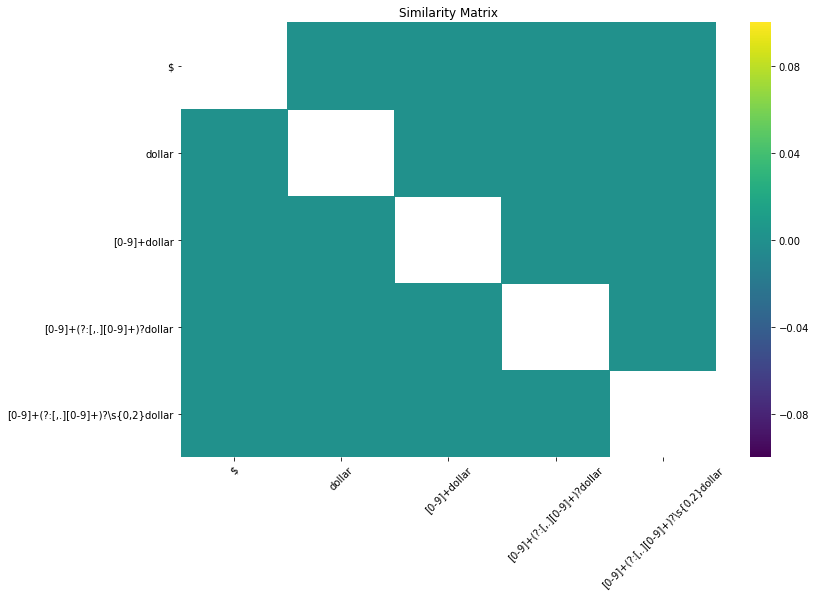

In [17]:
explore_regex.report('soft')

>** Ex. 9.2.4** 
Finally write a function that takes in a string and outputs if there is a match. Use the .match function to see if there is a match (hint if does not return a NoneType object - `re.match(pattern,string)!=None`).

> Define a column 'mention_currency' in the dataframe, by applying the above function to the text column of the dataframe. 
*** You should have approximately 310 reviews that matches. - but less is also alright***

> **Ex. 9.2.5** Explore the relation between reviews mentioning prices and the average rating. 

> **Ex. 9.2.extra** Define a function that outputs the amount mentioned in the review (if more than one the largest), define a new column by applying it to the data, and explore whether reviews mentioning higher prices are worse than others by plotting the amount versus the rating.

In [55]:
#[Answer to 9.2.4-5]

> **Ex. 9.2.5:** Now we write a regular expression to extract emoticons from text.
Start by locating all mouths ')' of emoticons, and develop the variations from there. Remember that paranthesis are special characters in regex, so you should use the escape character.